Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-245.415,-255.047,2.02666e-77
2,140.151,4.0,-242.423,-252.04,4.09719e-76
3,140.302,4.0,-239.459,-249.062,8.0506e-75
4,140.452,4.0,-236.524,-246.113,1.53748e-73
5,140.603,4.0,-233.617,-243.192,2.85382e-72
6,140.754,4.0,-230.738,-240.299,5.14851e-71
7,140.905,4.0,-227.888,-237.435,9.02765e-70
8,141.055,4.0,-225.066,-234.599,1.53853e-68
9,141.206,4.0,-222.273,-231.792,2.54844e-67


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,158.844,7.77889,-71.4246,-79.71,0.28481
2,159.296,7.45729,-72.146,-80.41,0.141442
3,157.638,8.82412,-70.5592,-78.9042,0.637561
4,155.075,9.70854,-70.7497,-79.2333,0.458754
5,155.528,8.0201,-70.053,-78.5109,0.944751
6,155.377,9.22613,-70.4204,-78.8869,0.648705
7,157.638,11.4774,-72.2879,-80.6329,0.113182
8,155.075,6.49246,-71.2448,-79.7284,0.279612
9,155.678,8.34171,-70.0652,-78.5147,0.941157


### Snippet 4.23

Density of sigma

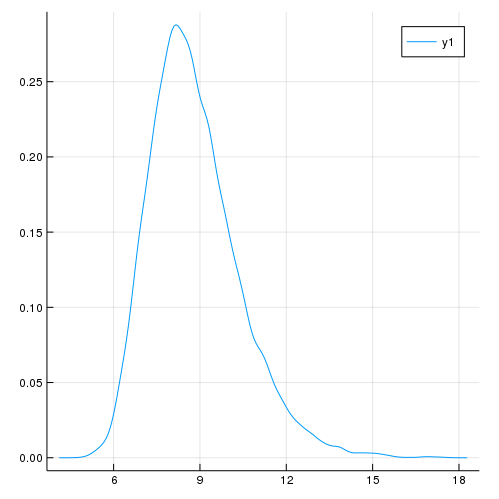

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*